# GCP - Vision API

[Vision API Reference](https://cloud.google.com/vision/)

## Setup

In [14]:
from __future__ import print_function
from google.cloud import vision
import os

# to show images being submitted
from google.cloud import storage
from IPython.display import Image


In [15]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/mikegoodman/Documents/developer/mg-ce-demos-baeebaf7fb05.json"


## Label detection

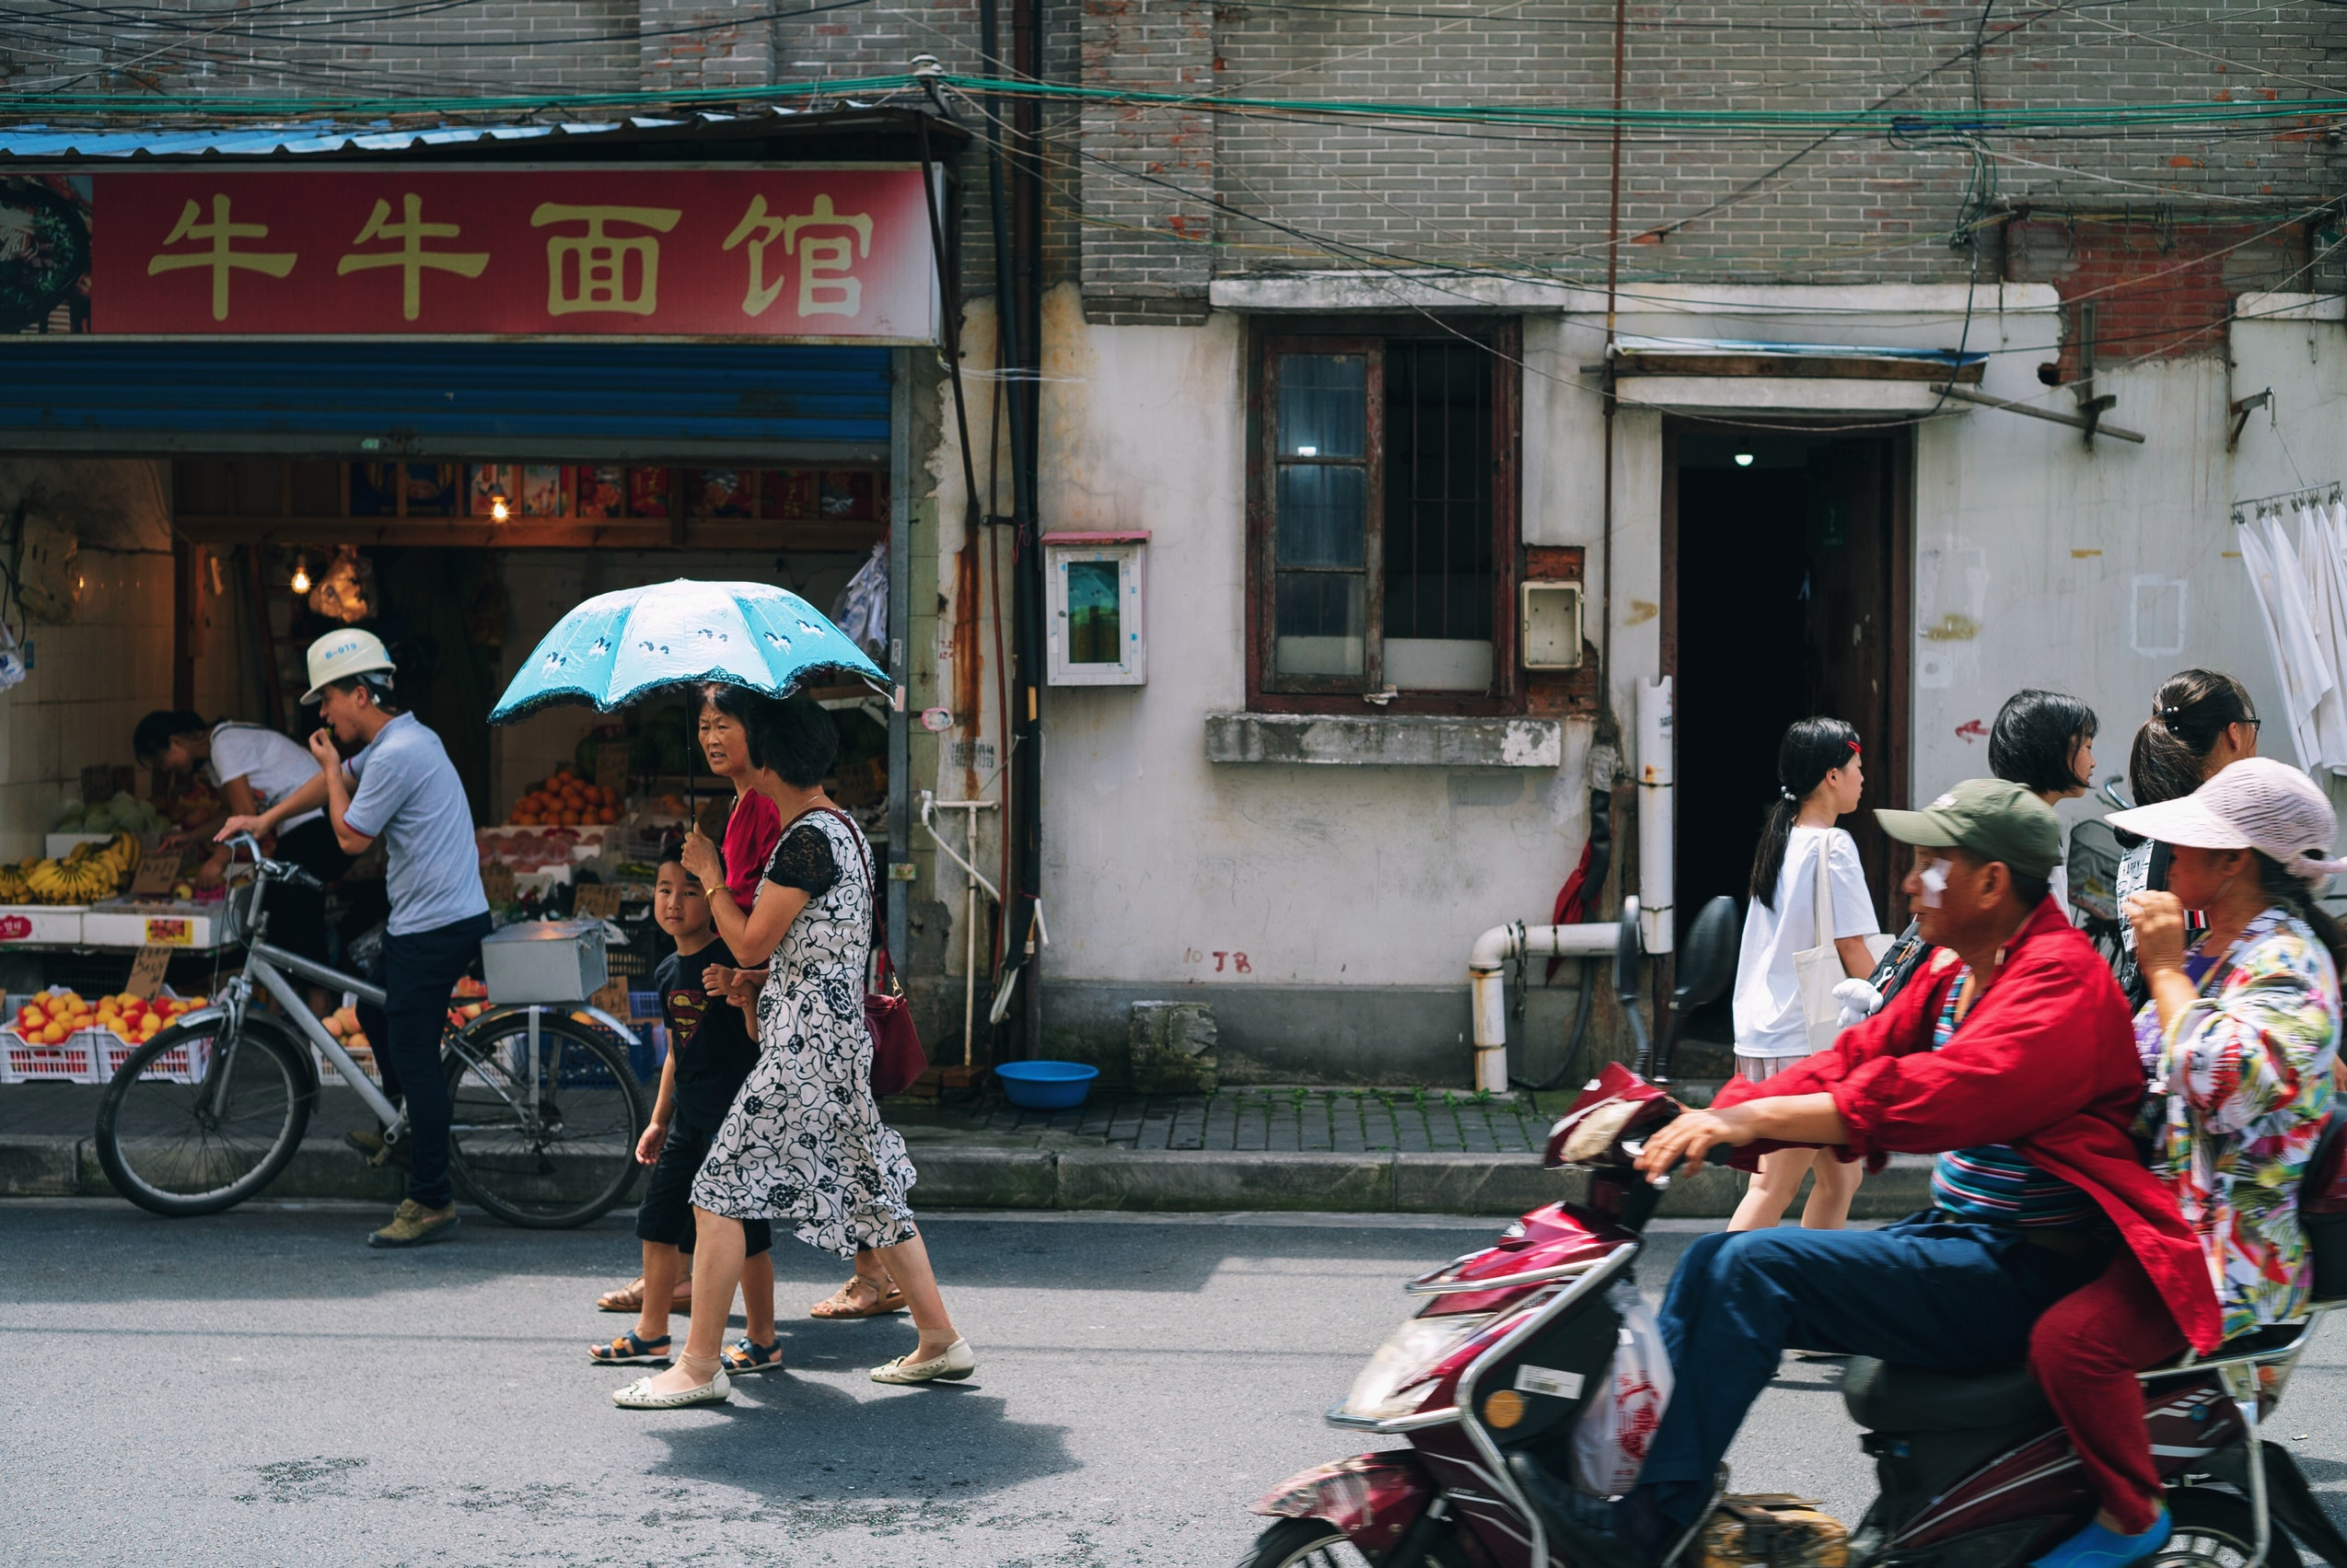

In [25]:
client = storage.Client()

bucket_text = 'cloud-samples-data'
bucket = client.get_bucket(bucket_text)
blob_text = 'vision/using_curl/shanghai.jpeg'
blob = bucket.get_blob(blob_text)
Image(blob.download_as_bytes())


In [23]:
image_uri = 'gs://' + bucket_text + '/' + blob_text

client = vision.ImageAnnotatorClient()
image = vision.Image()
image.source.image_uri = image_uri

response = client.label_detection(image=image)

print('Labels (and confidence score):')
print('=' * 30)
for label in response.label_annotations:
    print(label.description, '(%.2f%%)' % (label.score*100.))

Labels (and confidence score):
Wheel (97.90%)
Tire (97.85%)
Bicycle (94.53%)
Photograph (94.24%)
Motor vehicle (91.37%)
Infrastructure (89.83%)
Bicycle wheel (85.65%)
Mode of transport (85.51%)
Asphalt (82.82%)
Umbrella (81.78%)


## Text detection

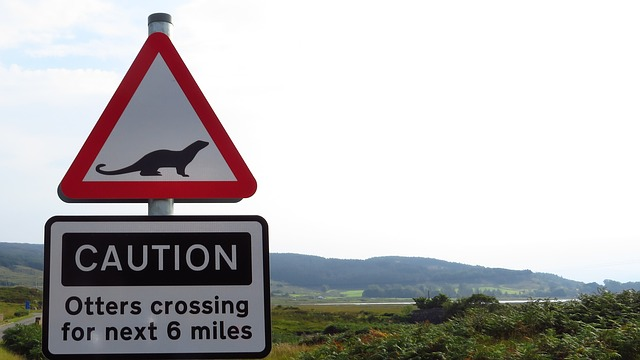

In [26]:
client = storage.Client()

bucket_text = 'cloud-vision-codelab'
bucket = client.get_bucket(bucket_text)
blob_text = 'otter_crossing.jpg'
blob = bucket.get_blob(blob_text)
Image(blob.download_as_bytes())


In [27]:
image_uri = 'gs://' + bucket_text + '/' + blob_text

client = vision.ImageAnnotatorClient()
image = vision.Image()
image.source.image_uri = image_uri

response = client.text_detection(image=image)

for text in response.text_annotations:
    print('=' * 30)
    print(text.description)
    vertices = ['(%s,%s)' % (v.x, v.y) for v in text.bounding_poly.vertices]
    print('bounds:', ",".join(vertices))

CAUTION
Otters crossing
for next 6 miles
bounds: (59,243),(249,243),(249,341),(59,341)
CAUTION
bounds: (75,244),(232,243),(232,269),(75,270)
Otters
bounds: (64,293),(141,294),(141,315),(64,314)
crossing
bounds: (150,294),(248,295),(248,316),(150,315)
for
bounds: (59,321),(94,320),(94,339),(59,340)
next
bounds: (104,320),(156,319),(156,338),(104,339)
6
bounds: (166,320),(178,320),(178,338),(166,338)
miles
bounds: (189,319),(249,318),(249,337),(189,338)


## Landmark detection

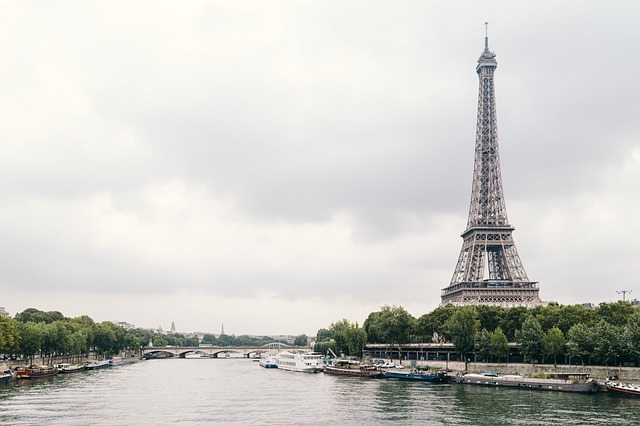

In [28]:
client = storage.Client()

bucket_text = 'cloud-vision-codelab'
bucket = client.get_bucket(bucket_text)
blob_text = 'eiffel_tower.jpg'
blob = bucket.get_blob(blob_text)
Image(blob.download_as_bytes())


In [29]:
image_uri = 'gs://' + bucket_text + '/' + blob_text

client = vision.ImageAnnotatorClient()
image = vision.Image()
image.source.image_uri = image_uri

response = client.landmark_detection(image=image)

for landmark in response.landmark_annotations:
    print('=' * 30)
    print(landmark)

mid: "/g/120xtw6z"
description: "Trocad\303\251ro Gardens"
score: 0.9115638732910156
bounding_poly {
  vertices {
    x: 328
    y: 36
  }
  vertices {
    x: 520
    y: 36
  }
  vertices {
    x: 520
    y: 371
  }
  vertices {
    x: 328
    y: 371
  }
}
locations {
  lat_lng {
    latitude: 48.861596299999995
    longitude: 2.2892823
  }
}

mid: "/m/02j81"
description: "Eiffel Tower"
score: 0.5787789821624756
bounding_poly {
  vertices {
    x: 458
    y: 76
  }
  vertices {
    x: 512
    y: 76
  }
  vertices {
    x: 512
    y: 255
  }
  vertices {
    x: 458
    y: 255
  }
}
locations {
  lat_lng {
    latitude: 48.858461
    longitude: 2.294351
  }
}

mid: "/m/02j81"
description: "Eiffel Tower"
score: 0.26367253065109253
bounding_poly {
  vertices {
    x: 217
    y: 253
  }
  vertices {
    x: 531
    y: 253
  }
  vertices {
    x: 531
    y: 335
  }
  vertices {
    x: 217
    y: 335
  }
}
locations {
  lat_lng {
    latitude: 48.875072
    longitude: 2.312622
  }
}

mid: "/m/

## Face detection (emotion)

In [34]:
def detect_faces_uri(uri):
    """Detects faces in the file located in Google Cloud Storage or the web."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = uri

    response = client.face_detection(image=image)
    faces = response.face_annotations

    print(faces)

In [35]:
uri_base = 'gs://cloud-vision-codelab'
pics = ('face_surprise.jpg', 'face_no_surprise.png')

for pic in pics:
    uri = uri_base + '/' + pic
    detect_faces_uri(uri)


[bounding_poly {
  vertices {
    x: 93
    y: 425
  }
  vertices {
    x: 520
    y: 425
  }
  vertices {
    x: 520
    y: 922
  }
  vertices {
    x: 93
    y: 922
  }
}
fd_bounding_poly {
  vertices {
    x: 141
    y: 500
  }
  vertices {
    x: 460
    y: 500
  }
  vertices {
    x: 460
    y: 874
  }
  vertices {
    x: 141
    y: 874
  }
}
landmarks {
  type_: LEFT_EYE
  position {
    x: 236.2025909423828
    y: 663.416748046875
    z: 0.001056671142578125
  }
}
landmarks {
  type_: RIGHT_EYE
  position {
    x: 354.3505554199219
    y: 653.6719970703125
    z: -13.341655731201172
  }
}
landmarks {
  type_: LEFT_OF_LEFT_EYEBROW
  position {
    x: 191.89964294433594
    y: 630.3827514648438
    z: 23.814125061035156
  }
}
landmarks {
  type_: RIGHT_OF_LEFT_EYEBROW
  position {
    x: 262.2677307128906
    y: 616.4370727539062
    z: -21.123950958251953
  }
}
landmarks {
  type_: LEFT_OF_RIGHT_EYEBROW
  position {
    x: 319.8587951660156
    y: 609.0903930664062
    z: -27.081

In [30]:
uri_base = 'gs://cloud-vision-codelab'
pics = ('face_surprise.jpg', 'face_no_surprise.png')

client = vision.ImageAnnotatorClient()
image = vision.Image()

for pic in pics:
    image.source.image_uri = '%s/%s' % (uri_base, pic)
    response = client.face_detection(image=image)

    print('=' * 30)
    print('File:', pic)
    for face in response.face_annotations:
        likelihood = vision.Likelihood(face.surprise_likelihood)
        vertices = ['(%s,%s)' % (v.x, v.y) for v in face.bounding_poly.vertices]
        print('Face surprised:', likelihood.name)
        print('Face bounds:', ",".join(vertices))

File: face_surprise.jpg
Face surprised: LIKELY
Face bounds: (93,425),(520,425),(520,922),(93,922)
File: face_no_surprise.png
Face surprised: VERY_UNLIKELY
Face bounds: (120,0),(334,0),(334,198),(120,198)
